<a href="https://colab.research.google.com/github/COMP-380-DATA-SCIENCE/leaf-disease-classifier/blob/main/Leaf_Disease_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install dataset

In [6]:
!pip install datasets[vision]

In [7]:
!pip install --upgrade transformers
!pip install --upgrade datasets

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from datasets import list_datasets, load_dataset

#Loads dataset from Huggingface
dataset = load_dataset("Treelar/plant_village", split = "train")

In [9]:
splits = dataset.train_test_split(test_size=0.1)
train_ds = splits["train"]
test_ds = splits["test"]

In [10]:
train_ds.features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spide

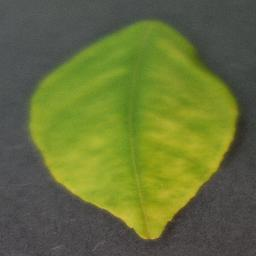

In [11]:
train_ds[0]['image']

In [12]:
id2label = {id: label for id, label in enumerate(train_ds.features['label'].names)}
label2id = {label:id for id,label in id2label.items()}
id2label

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Background_without_leaves',
 5: 'Blueberry___healthy',
 6: 'Cherry___Powdery_mildew',
 7: 'Cherry___healthy',
 8: 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 9: 'Corn___Common_rust',
 10: 'Corn___Northern_Leaf_Blight',
 11: 'Corn___healthy',
 12: 'Grape___Black_rot',
 13: 'Grape___Esca_(Black_Measles)',
 14: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 15: 'Grape___healthy',
 16: 'Orange___Haunglongbing_(Citrus_greening)',
 17: 'Peach___Bacterial_spot',
 18: 'Peach___healthy',
 19: 'Pepper,_bell___Bacterial_spot',
 20: 'Pepper,_bell___healthy',
 21: 'Potato___Early_blight',
 22: 'Potato___Late_blight',
 23: 'Potato___healthy',
 24: 'Raspberry___healthy',
 25: 'Soybean___healthy',
 26: 'Squash___Powdery_mildew',
 27: 'Strawberry___Leaf_scorch',
 28: 'Strawberry___healthy',
 29: 'Tomato___Bacterial_spot',
 30: 'Tomato___Early_blight',
 31: 'Tomato___Late_blight',
 32: 'Toma

In [13]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 'label': 16}

array([[[160, 148, 152],
        [161, 149, 153],
        [161, 149, 153],
        ...,
        [145, 129, 130],
        [142, 126, 127],
        [140, 124, 125]],

       [[160, 148, 152],
        [160, 148, 152],
        [160, 148, 152],
        ...,
        [141, 125, 126],
        [139, 123, 124],
        [138, 122, 123]],

       [[162, 150, 154],
        [161, 149, 153],
        [160, 148, 152],
        ...,
        [141, 125, 126],
        [142, 126, 127],
        [142, 126, 127]],

       ...,

       [[151, 144, 151],
        [150, 143, 150],
        [148, 141, 148],
        ...,
        [ 94,  84,  83],
        [ 92,  82,  81],
        [ 92,  82,  81]],

       [[148, 141, 148],
        [147, 140, 147],
        [147, 140, 147],
        ...,
        [ 93,  83,  82],
        [ 92,  82,  81],
        [ 91,  81,  80]],

       [[144, 137, 144],
        [144, 137, 144],
        [145, 138, 145],
        ...,
        [ 93,  83,  82],
        [ 92,  82,  81],
        [ 91,  81,  80]]], dtype=uint8)
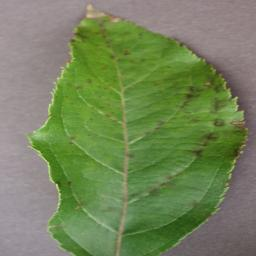

In [14]:
#Converts image to a numpy array
image_array = tf.keras.utils.img_to_array(dataset[0]['image'], dtype=np.uint8)
image_array

In [15]:
#Transforms the image
def train_transforms(examples):
    #Stores shape, dtype, and numpy array into pixel values
    examples['pixel_values'] = [tf.convert_to_tensor(tf.keras.utils.img_to_array(image.resize([192,192]).convert("RGB"))) for image in examples['image']]
    #stores labes in labels
    examples["labels"] = examples["label"]
    return examples

In [16]:
#applies transform to images in dataset
prepared_train_ds = train_ds.with_transform(train_transforms)

In [17]:
prepared_train_ds[1000]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 'label': 1,
 'pixel_values': <tf.Tensor: shape=(192, 192, 3), dtype=float32, numpy=
 array([[[161., 145., 148.],
         [152., 136., 139.],
         [155., 139., 142.],
         ...,
         [159., 143., 144.],
         [135., 119., 120.],
         [146., 130., 131.]],
 
        [[146., 130., 133.],
         [152., 136., 139.],
         [164., 148., 151.],
         ...,
         [152., 136., 137.],
         [159., 143., 144.],
         [142., 126., 127.]],
 
        [[153., 137., 140.],
         [168., 152., 155.],
         [146., 130., 133.],
         ...,
         [162., 146., 147.],
         [159., 143., 144.],
         [144., 128., 129.]],
 
        ...,
 
        [[159., 144., 149.],
         [174., 159., 164.],
         [168., 153., 158.],
         ...,
         [160., 145., 148.],
         [160., 145., 148.],
         [152., 137., 140.]],
 
        [[151., 136., 141.],
         [169., 154., 159.],
   

In [18]:
prepared_train_ds[0]['pixel_values'].shape

TensorShape([192, 192, 3])

In [19]:
tf_ds = prepared_train_ds.to_tf_dataset(
            columns=["pixel_values"],
            label_cols=["labels"],
            batch_size=2,
            shuffle=True
            )

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:401: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [21]:
num_classes = len(id2label)
img_height,img_width = (192,192)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomContrast(0.5),
  tf.keras.layers.RandomCrop(192,192,0.2),
  tf.keras.layers.RandomZoom(0.4),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation="softmax")
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #remove from logits
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 192, 192, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 192, 192, 3)       0         
                                                                 
 random_rotation_1 (RandomR  (None, 192, 192, 3)       0         
 otation)                                                        
                                                                 
 random_contrast_1 (RandomC  (None, 192, 192, 3)       0         
 ontrast)                                                        
                                                                 
 random_crop (RandomCrop)    (None, 192, 192, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 192, 192, 3)       0

In [24]:
prepared_test_ds = test_ds.with_transform(train_transforms)
val_ds = prepared_test_ds.to_tf_dataset(
            columns=["pixel_values"],
            label_cols=["labels"],
            batch_size=2,
            shuffle=True
            )

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:401: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [25]:
prepared_test_ds[0]['pixel_values'].shape

TensorShape([192, 192, 3])

In [26]:
model.fit(
    tf_ds,
    validation_data = val_ds,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24951/24951 [==============================] - 410s 16ms/step - loss: 1.8883 - sparse_categorical_accuracy: 0.4728 - val_loss: 1.1384 - val_sparse_categorical_accuracy: 0.6550
Epoch 2/10
24951/24951 [==============================] - 387s 16ms/step - loss: 1.2130 - sparse_categorical_accuracy: 0.6386 - val_loss: 0.9864 - val_sparse_categorical_accuracy: 0.7023
Epoch 3/10
24951/24951 [==============================] - 381s 15ms/step - loss: 1.0113 - sparse_categorical_accuracy: 0.6999 - val_loss: 0.7606 - val_sparse_categorical_accuracy: 0.7672
Epoch 4/10
24951/24951 [==============================] - 427s 17ms/step - loss: 0.9091 - sparse_categorical_accuracy: 0.7303 - val_loss: 0.7244 - val_sparse_categorical_accuracy: 0.7760
Epoch 5/10
24951/24951 [==============================] - 382s 15ms/step - loss: 0.8414 - sparse_categorical_accuracy: 0.7494 - val_loss: 0.7233 - val_sparse_categorical_accuracy: 0.7830
Epoch 6/10
24951/24951 [==============================] - 396s 16ms/step - l

In [ ]:
model.save('sparse_categorical_model_v2.keras')

In [27]:
from PIL import Image


In [28]:
class_names = []
for label in id2label.values():
  class_names.append(label)
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot'

In [49]:
#Tests recognition of uploaded image
img_path = '/content/orange_huanglongbing.jpeg'
img = Image.open(img_path).convert("RGB")
img = img.resize((192,192),resample=Image.BILINEAR)
img_array = tf.keras.utils.img_to_array(img, dtype=np.uint8)
img_array = img_array[np.newaxis]

In [50]:
prediction = model.predict(img_array)
test_label = class_names[np.argmax(prediction[0])]
test_label

1/1 [==============================] - 0s 20ms/step


'Tomato___Bacterial_spot'

In [44]:
#Tests recognition of dataset images
test_index = 2500
test_image = prepared_train_ds[test_index]['pixel_values']
test_image = test_image[np.newaxis]
test_image.shape
test_prediction = model.predict(test_image)
test_label = class_names[np.argmax(test_prediction[0])]
test_label

1/1 [==============================] - 0s 25ms/step


'Tomato___Tomato_Yellow_Leaf_Curl_Virus'

In [45]:
class_names[prepared_train_ds[2000]['label']]

'Tomato___healthy'

In [41]:
prediction

array([[7.61908519e-22, 1.47828789e-17, 3.42916291e-15, 2.31697569e-26,
        5.66515207e-01, 5.04446492e-29, 4.92740072e-15, 1.17670966e-20,
        2.50607650e-06, 3.07414704e-03, 1.10601550e-05, 1.50811326e-15,
        1.18643648e-05, 3.77033604e-09, 2.87466198e-02, 5.52602537e-25,
        6.46795926e-15, 1.00915702e-06, 0.00000000e+00, 4.61190008e-04,
        5.16592743e-20, 3.47795814e-01, 8.03142744e-18, 1.02282250e-36,
        5.70058267e-28, 3.90675904e-19, 5.20816073e-02, 1.27411040e-03,
        1.21016272e-23, 2.07729445e-05, 7.06693015e-08, 3.36540643e-06,
        1.17336580e-20, 2.46023737e-16, 3.84720503e-18, 3.51041449e-16,
        6.81156848e-07, 1.51043780e-32, 1.16758805e-20]], dtype=float32)